<a href="https://colab.research.google.com/github/IboPMoro/Walmart_Forecast/blob/main/AUTO_ARIMA_Wallmart_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 15.7 MB/s 
     |████████████████████████████████| 9.9 MB 41.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install colorama

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive 
import numpy as np
drive.mount('/content/drive', force_remount=True) 
import seaborn as sns 
from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import math
import warnings
from keras.models import Sequential
from keras.layers import Dense, LSTM 
warnings.filterwarnings('ignore')

np.random.seed(7)

Mounted at /content/drive


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Final/Walmart_Store_sales.csv')
pd.options.display.float_format = '{:,.2f}'.format 

In [ ]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
data = df[['Date','Weekly_Sales']].copy()
data.dropna(inplace=True)
data.columns = ['Week','Sales']
data

,Week,Sales
0,2010-05-02,"1,643,690.90"
1,2010-12-02,"1,641,957.44"
2,2010-02-19,"1,611,968.17"
3,2010-02-26,"1,409,727.59"
4,2010-05-03,"1,554,806.68"
...,...,...
6430,2012-09-28,"713,173.95"
6431,2012-05-10,"733,455.07"
6432,2012-12-10,"734,464.36"
6433,2012-10-19,"718,125.53"


In [ ]:
data = pd.DataFrame(data.groupby('Week',as_index=False)['Sales'].sum()).copy()
data

,Week,Sales
0,2010-01-10,"42,239,875.87"
1,2010-02-04,"50,423,831.26"
2,2010-02-07,"48,917,484.50"
3,2010-02-19,"48,276,993.78"
4,2010-02-26,"43,968,571.13"
...,...,...
138,2012-10-08,"47,403,451.04"
139,2012-10-19,"45,122,410.57"
140,2012-10-26,"45,544,116.29"
141,2012-11-05,"46,925,878.99"


In [ ]:
data['Week'] = pd.to_datetime(data['Week'])
data.set_index('Week',inplace=True)

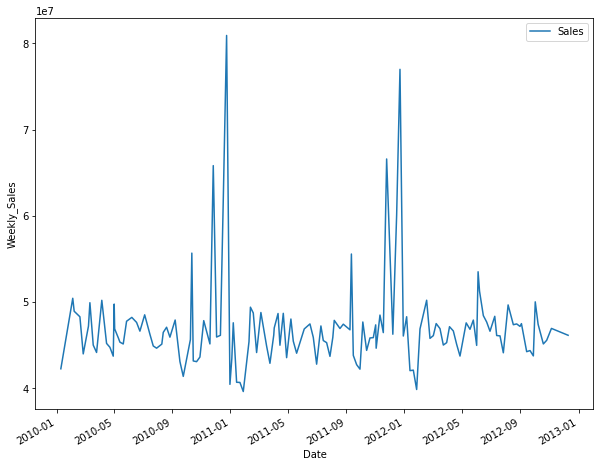

In [ ]:
ax = data.plot(figsize=(10, 8))
ax.set_ylabel('Weekly_Sales')
ax.set_xlabel('Date')
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


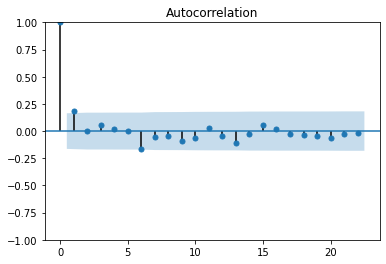

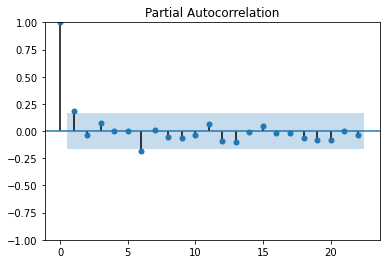

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_orginial = plot_acf(data)

pacf_original = plot_pacf(data) 

In [ ]:
from pmdarima.arima import ADFTest

In [ ]:
adf_test = ADFTest(alpha=0.5)
adf_test.should_diff(data)

(0.01, False)

Todo sugiere que los datos son "***ESTACIONARIOS***"

In [ ]:
train_size = int(0.85 * len(data))
test_size = len(data) - train_size

univariate_df = data[['Week', 'Sales']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

121 22


In [ ]:
from pmdarima import auto_arima

In [ ]:
model = auto_arima(y_train,start_p = 1, d = 1, start_q = 2, m = 52,
                   max_p = 5, max_d = 5, max_q = 5, start_P = 0,
                   D = 1, start_Q = 0, max_P = 5,max_D=5,
                   max_Q = 5, seasonal=True,
                   error_action ='warn', trace = True,
                   suppress_warnings = True, stepwise = True,
                   random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,1,0)[52]             : AIC=2320.936, Time=1.74 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2339.608, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2304.240, Time=1.92 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=2295.684, Time=2.55 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=2322.618, Time=0.34 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=2297.646, Time=5.17 sec
 ARIMA(0,1,1)(0,1,2)[52]             : AIC=2297.637, Time=7.95 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=2299.145, Time=1.73 sec
 ARIMA(0,1,1)(1,1,2)[52]             : AIC=inf, Time=27.93 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=2307.245, Time=3.50 sec
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=2296.322, Time=3.81 sec
 ARIMA(0,1,2)(0,1,1)[52]             : AIC=inf, Time=6.07 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=2301.758, Time=2.70 sec
 ARIMA(1,1,2)(0,1,1)[52]             : AIC=2292.525, Time=15.97 sec
 ARIMA(1,1,2)(1,1,1)[52]   

In [ ]:
data = univariate_df.filter(['y'])

dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.93612574],
       [-0.73811834],
       [-0.77456377],
       [-0.79006018],
       [-0.89430068],
       [-0.81625653],
       [-0.75057379],
       [-0.86961244],
       [-0.89029914],
       [-0.74381104]])

In [ ]:
look_back = 52

train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)


x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

17 22


In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
17/17 [==============================] - 8s 82ms/step - loss: 0.2238 - val_loss: 0.0722
Epoch 2/5
17/17 [==============================] - 0s 9ms/step - loss: 0.0164 - val_loss: 0.0045
Epoch 3/5
17/17 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 4/5
17/17 [==============================] - 0s 9ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 5/5
17/17 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0023
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            92672     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                              

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
score_mape = mean_absolute_percentage_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
print(Fore.GREEN + 'MAE: {}'.format(score_mae))
print(Fore.GREEN + 'MAPE: {}'.format(score_mape))

1/1 [==============================] - 0s 33ms/step
RMSE: 1971525.5174700208
MAE: 1511108.686818184
MAPE: 0.03193780209356846


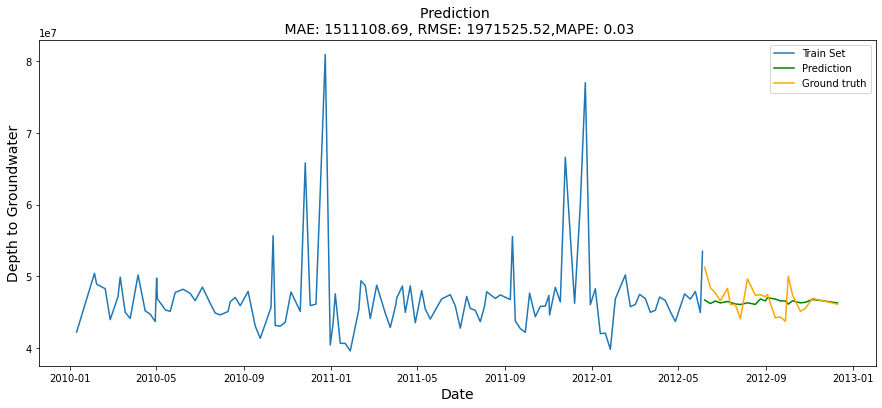

In [ ]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f},MAPE: {score_mape:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()